Insurance dataset is a data set about predicting the amount of insurance to pay for a patient, which includes the following features:
- age: Age of the patient, is a positive integer value
- sex: Patient's gender where 0 is male, 1 is female
- bmi: The patient's BMI, is the actual value
- children: Number of children of the patient, is a positive integer value
- smoker: Indicates whether the patient smokes, where 1 is yes and 0 is no
- region: Indicate the region the patient is in, 0 is southwest 1 is southeast 2 is northwest and 3 is northeast

- charges: Individual medical costs billed by health insurance.

In [ ]:
#import library
import pandas as pd # pandas
import numpy as np # numpy
import time


In [ ]:
#Download Dataset
!wget https://raw.githubusercontent.com/huynhthanh98/data__/refs/heads/main/Insurance.csv

--2025-03-28 11:08:28--  https://raw.githubusercontent.com/huynhthanh98/data__/refs/heads/main/Insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3117837 (3.0M) [text/plain]
Saving to: ‘Insurance.csv.1’

Insurance.csv.1     100%[===================>]   2.97M  --.-KB/s    in 0.03s   

2025-03-28 11:08:28 (95.1 MB/s) - ‘Insurance.csv.1’ saved [3117837/3117837]



# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # read data using Pandas DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
df = read_dataset("/content/Insurance.csv")

,age,sex,bmi,children,smoker,region,charges
0,43,female,25.800,0,yes,northwest,31128.291496
1,43,female,28.600,2,no,southwest,8739.200017
2,34,female,37.290,4,no,northeast,10979.246131
3,50,female,42.370,3,no,southeast,15278.753423
4,26,female,29.595,1,no,northeast,5153.591905


,age,bmi,children,charges
count,59333.000000,59333.000000,59333.000000,59333.000000
mean,40.791448,30.930536,1.107411,13459.312130
std,13.897712,6.121275,1.455713,10175.464573
min,18.000000,15.815000,-1.000000,0.375242
25%,28.000000,26.510000,0.000000,6449.205453
50%,42.000000,30.600000,1.000000,10570.434369
75%,52.000000,35.000000,2.000000,15058.323202
max,65.000000,54.130000,6.000000,63770.428010


## Data Analysis

<Axes: >

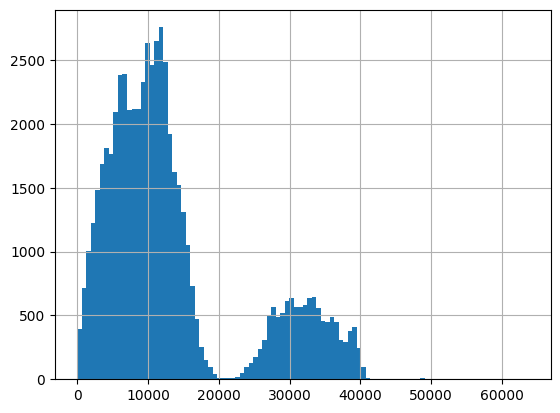

In [ ]:
df["charges"].hist(bins=100)

<Axes: xlabel='charges', ylabel='Count'>

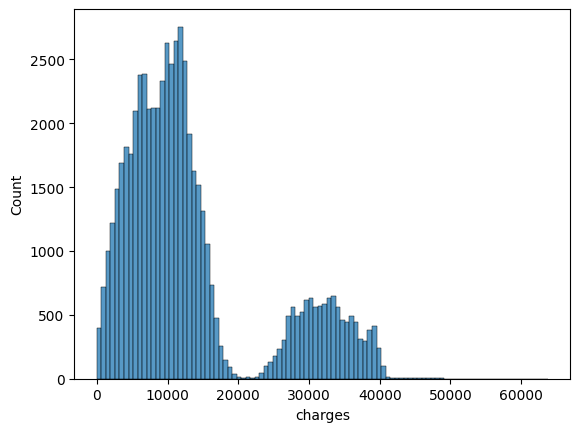

In [ ]:
import seaborn as sns
sns.histplot(x="charges", data=df, bins=100)

In [ ]:
# Null checking
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Preprocessing

In [ ]:
# --- (Optional) Drop null datapoints or fill missing data
# print("Sample size:", len(df))
# df = df.dropna() <=> df.dropna(inplace=True)
# df = df.dropna()
# print("Not null sample size:", len(df))

In [ ]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    df = df
    return df

In [ ]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [ ]:
# ---- Method 1
start_time = time.time()
# data normalization
normalized_data = df.copy()
normalized_data["sex"] = normalized_data["sex"].apply(lambda x: 0 if x=="male" else 1)
normalized_data["smoker"] = normalized_data["smoker"].apply(lambda x: 0 if x=="no" else 1)
normalized_data["region"] = normalized_data["region"].apply(lambda x: 0 if x=="southwest" else 1 if x=="southeast" else 2 if x=="northwest"else 3 )
#normalized_data

display(normalized_data.head())
display(normalized_data.corr())
print("Running time", time.time() - start_time)

,age,sex,bmi,children,smoker,region,charges
0,43,1,25.800,0,1,2,31128.291496
1,43,1,28.600,2,0,0,8739.200017
2,34,1,37.290,4,0,3,10979.246131
3,50,1,42.370,3,0,1,15278.753423
4,26,1,29.595,1,0,3,5153.591905


,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.004123,0.091252,0.008060,-0.029931,-0.007996,0.331857
sex,0.004123,1.000000,-0.049948,-0.017484,-0.080734,0.015634,-0.084363
bmi,0.091252,-0.049948,1.000000,0.030296,0.002000,-0.149486,0.202631
children,0.008060,-0.017484,0.030296,1.000000,0.002852,-0.021358,0.087100
smoker,-0.029931,-0.080734,0.002000,0.002852,1.000000,-0.031686,0.909658
region,-0.007996,0.015634,-0.149486,-0.021358,-0.031686,1.000000,-0.024945
charges,0.331857,-0.084363,0.202631,0.087100,0.909658,-0.024945,1.000000


Running time 0.13226962089538574


In [ ]:
start_time = time.time()
# ---- Method 2
normalized_data = pd.get_dummies(df.loc[:, ["sex", "smoker", "region"]])
normalized_data = pd.concat([normalized_data, df.loc[:, ["age", "bmi", "children"]]], axis=1)
normalized_data = pd.concat([normalized_data, df.loc[:, ["charges"]]], axis=1)


display(normalized_data.head())
display(normalized_data.corr())
print("Running time", time.time() - start_time)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,True,False,False,True,False,True,False,False,43,25.800,0,31128.291496
1,True,False,True,False,False,False,False,True,43,28.600,2,8739.200017
2,True,False,True,False,True,False,False,False,34,37.290,4,10979.246131
3,True,False,True,False,False,False,True,False,50,42.370,3,15278.753423
4,True,False,True,False,True,False,False,False,26,29.595,1,5153.591905


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
sex_female,1.000000,-1.000000,0.080734,-0.080734,0.017069,0.011962,-0.033103,0.005501,0.004123,-0.049948,-0.017484,-0.084363
sex_male,-1.000000,1.000000,-0.080734,0.080734,-0.017069,-0.011962,0.033103,-0.005501,-0.004123,0.049948,0.017484,0.084363
smoker_no,0.080734,-0.080734,1.000000,-1.000000,0.029525,0.031759,-0.066710,0.008428,0.029931,-0.002000,-0.002852,-0.909658
smoker_yes,-0.080734,0.080734,-1.000000,1.000000,-0.029525,-0.031759,0.066710,-0.008428,-0.029931,0.002000,0.002852,0.909658
region_northeast,0.017069,-0.017069,0.029525,-0.029525,1.000000,-0.314169,-0.349519,-0.325871,-0.011974,-0.107808,-0.025929,-0.024987
region_northwest,0.011962,-0.011962,0.031759,-0.031759,-0.314169,1.000000,-0.339922,-0.316923,0.007725,-0.167716,0.020386,-0.044825
region_southeast,-0.033103,0.033103,-0.066710,0.066710,-0.349519,-0.339922,1.000000,-0.352583,0.000031,0.257732,-0.016937,0.095170
region_southwest,0.005501,-0.005501,0.008428,-0.008428,-0.325871,-0.316923,-0.352583,1.000000,0.004309,0.005378,0.023325,-0.029555
age,0.004123,-0.004123,0.029931,-0.029931,-0.011974,0.007725,0.000031,0.004309,1.000000,0.091252,0.008060,0.331857
bmi,-0.049948,0.049948,-0.002000,0.002000,-0.107808,-0.167716,0.257732,0.005378,0.091252,1.000000,0.030296,0.202631


Running time 0.11009907722473145


In [ ]:
def normalize_data(df):
    # ---- Method 3
    start_time = time.time()
    # data normalization
    normalized_data = df.copy()
    normalized_data["sex"] = normalized_data["sex"].astype("category").cat.codes
    normalized_data["smoker"] = normalized_data["smoker"].astype("category").cat.codes
    normalized_data["region"] = normalized_data["region"].astype("category").cat.codes

    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time", time.time() - start_time)
    return normalized_data


,age,sex,bmi,children,smoker,region,charges
0,43,0,25.800,0,1,1,31128.291496
1,43,0,28.600,2,0,3,8739.200017
2,34,0,37.290,4,0,0,10979.246131
3,50,0,42.370,3,0,2,15278.753423
4,26,0,29.595,1,0,0,5153.591905


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.004123,0.091252,0.008060,-0.029931,0.007996,0.331857
sex,-0.004123,1.000000,0.049948,0.017484,0.080734,0.015634,0.084363
bmi,0.091252,0.049948,1.000000,0.030296,0.002000,0.149486,0.202631
children,0.008060,0.017484,0.030296,1.000000,0.002852,0.021358,0.087100
smoker,-0.029931,0.080734,0.002000,0.002852,1.000000,0.031686,0.909658
region,0.007996,0.015634,0.149486,0.021358,0.031686,1.000000,0.024945
charges,0.331857,0.084363,0.202631,0.087100,0.909658,0.024945,1.000000


Running time 0.06364989280700684


<Axes: >

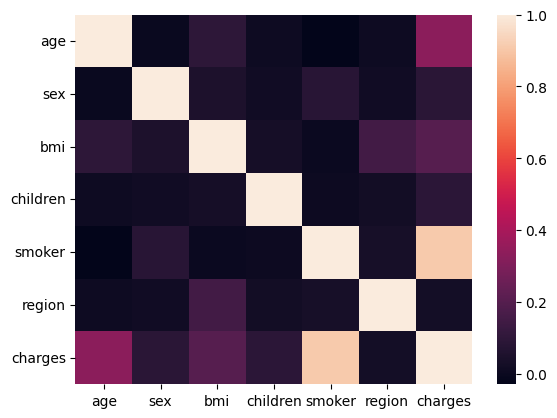

In [ ]:
# Heatmap
import seaborn as sns

normalized_data = normalize_data(df.copy())
sns.heatmap(normalized_data.corr())

# Apply machine learning model

## Train-test split

In [ ]:
def prepare_X_y(df):
    ## Split X, y from dataset
    columns = df.columns.tolist()     # Columns name
    columns.remove('charges')           # Remove y label (column charges in this case)
    # columns = ["smoker_yes", "bmi", "age"]
    X = df[columns]        # X
    y = df.charges          # y
    return X, y

X, y = prepare_X_y(normalized_data)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

trainX, testX ,trainY, testY = split_train_test(X, y)

Training:(41533, 6)
Test:(17800, 6)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(trainX, trainY)

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  100.20046571600277
mean absolute error of linear model on test set  97.05605617711703
[  251.5138989     37.66451724   285.95725561   541.05605803
 23646.11182404  -317.42447355]

-10384.586630782997


## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  143.56015930797744
mean absolute error of linear model (with poly transform) on test set  140.24868998741488


degree of PolynomialFeatures function is defined by a tuple (x, y) where x is the smallest degree, y is the largest degree, if we only input 1 value t, the function will understand x = 0 and y = t

> Indented block
* if the 2nd order with 1 feature is $X_1$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_1^2$$
* if the 2nd order with 2 features is $X_1$ and $X_2$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_2+\theta_3*X_1^2 + \theta_4*X_2^2 + \theta_5*X_1*X_2$$

In [ ]:
# --- To get output of polynomial model
# We can call its name
linear_model = poly_model["linearregression"]
# or by number
linear_model = poly_model[1]

# Bonus (Visualization)

In [ ]:
from sklearn.manifold import TSNE

# Split X, y from dataset
columns = normalized_data.columns.tolist()     # Columns name
draw_data = normalized_data[columns]        # X
draw_data = TSNE(n_components=1, learning_rate='auto', init='random', perplexity=3).fit_transform(draw_data)

In [ ]:
from sklearn.model_selection import train_test_split
draw_train_X, draw_test_X ,trainY, testY = train_test_split(draw_data, y, train_size=0.70, random_state=2023)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(41533, 6)
Test:(17800, 6)


In [ ]:
#model basic
model = LinearRegression(fit_intercept=True)
model.fit(draw_train_X, trainY)
pred = model.predict(draw_train_X)
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )

#model polinomial
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
poly_model.fit(draw_train_X, trainY)
poly_pred = poly_model.predict(draw_train_X)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )


mean absolute error of linear model on train set  7772.260841883907
mean absolute error of linear model (with poly transform) on train set  7291.453348970418


In [ ]:
draw_train_X

array([[-44.157715],
       [-15.726524],
       [-23.187136],
       ...,
       [ 39.768814],
       [-17.476479],
       [ 71.35035 ]], dtype=float32)

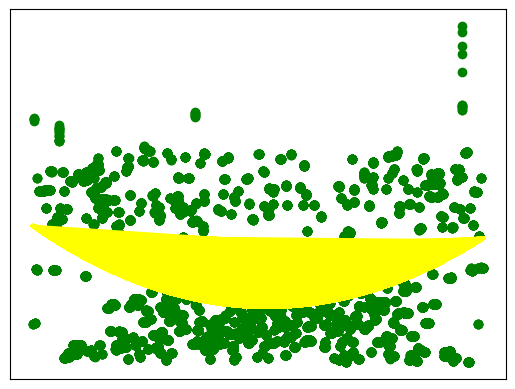

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(draw_train_X, trainY, color="g")
plt.plot(draw_train_X, pred, color="blue", linewidth=3)
plt.plot(draw_train_X, poly_pred, color="yellow", linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/uKAq34QrbwTcbs5Z9 (Submit your .ipynb file)